In [3]:
# api key
# e734d2ae27450ddcc20a5a8eb5d46c107c28f88a



# get함수
# 다중회사 주요계정 개발 가이드 (회사 재무표)
#     - https://opendart.fss.or.kr/api/fnlttMultiAcnt.json

# 고유번호 개발 가이드 (회사코드 찾기)
#     - https://opendart.fss.or.kr/api/corpCode.json

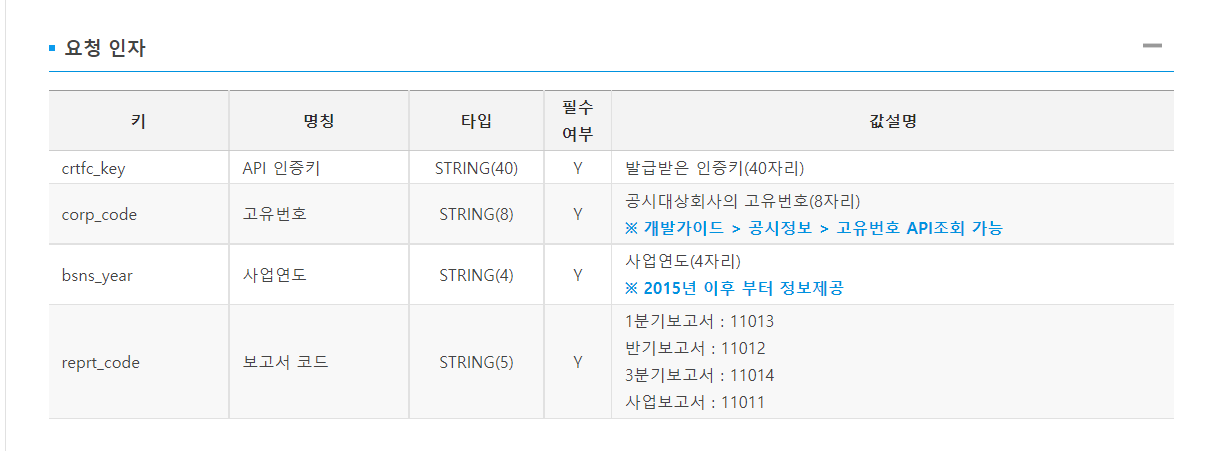

In [10]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

In [4]:
df_corpcode

종목명    종목코드      기업코드       수정일
0          지놈앤컴퍼니  314130  01276026  20210216
1              웹젠  069080  00405320  20210215
2             우리넷  115440  00664048  20210217
3         마이크로디지탈  305090  01267967  20210217
4              나노  187790  00994994  20210216
5             손오공  066910  00306870  20210216
6            새로닉스  042600  00147994  20210217
7           피씨디렉트  051380  00297934  20210217
8             이큐셀  160600  00818472  20210125
9           케이엠제약  225430  01095704  20210126
10         교보9호스팩  331520  01398151  20210126
11         네추럴FNP  086220  00523176  20210217
12           로보로보  215100  01063990  20210217
13          DSR제강  069730  00151298  20210215
14    교보10호기업인수목적  355150  01476219  20210126
15          아이비김영  339950  01414422  20210217
16        메디안디노스틱  233250  01035942  20210215
17       미래에셋맵스리츠  357250  01437292  20210127
18         한국정밀기계  101680  00257732  20210128
19            비비씨  318410  01153105  20210217
20             삼기  122350  00799177  20210217
21         씨앤에스링크  245450  01116380  20210217
22          유나이티드  033270  00158963  20210215
23           지니언스  263860  00962223  20210215
24            파라텍  033540  00105138  20210105
25         예스코홀딩스  015360  00105101  20210105
26           시노펙스  025320  00203023  20210105
27           모나리자  012690  00173102  20210215
28         티웨이홀딩스  004870  00109514  20210215
29        씨앤지하이테크  264660  00605328  20210215
...           ...     ...       ...       ...
1945         맘스터치  220630  01089855  20210511
1946           대교  019680  00108913  20210512
1947         동국제강  001230  00114792  20210512
1948          모아텍  033200  00241209  20210513
1949          아리온  058220  00441128  20210611
1950           GV  045890  00455112  20210611
1951      SGA솔루션즈  184230  00988364  20210611
1952         아이엠텍  226350  00809517  20210611
1953         엘비루셈  376190  00527011  20210611
1954        한화솔루션  009830  00162461  20210503
1955       한국조선해양  009540  00164830  20210506
1956           라임  065160  00389387  20210512
1957         제주은행  006220  00148832  20210512
1958         신화실업  001770  00137809  20210503
1959           대원  007680  00111838  20210601
1960      제이씨현시스템  033320  00223513  20210601
1961        한솔홀딩스  004150  00171636  20210601
1962     이베스트투자증권  078020  00330424  20210601
1963       롯데하이마트  071840  00158307  20210602
1964       SM C&C  048550  00185046  20210602
1965       한국전력공사  015760  00159193  20210602
1966        상지카일룸  042940  00232007  20210602
1967       AJ네트웍스  095570  00365387  20210513
1968      한국코퍼레이션  050540  00302078  20210513
1969       KB손해보험  002550  00120216  20210513
1970          컨버즈  109070  00753643  20210513
1971          텔라움  047730  00304401  20210506
1972      뉴파워프라즈마  144960  00521390  20210602
1973     에이디테크놀로지  200710  00657002  20210602
1974        엘브이엠씨  900140  00838500  20210611

[1975 rows x 4 columns]

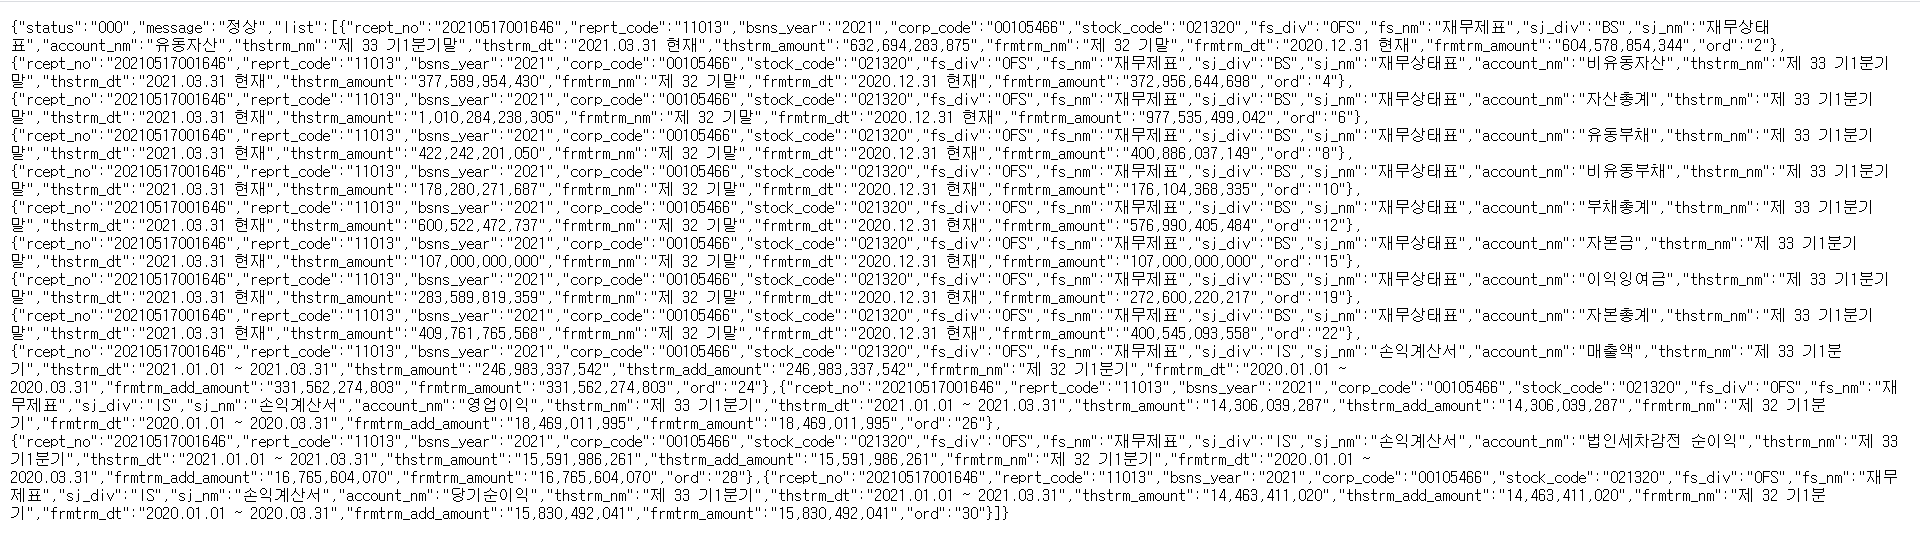

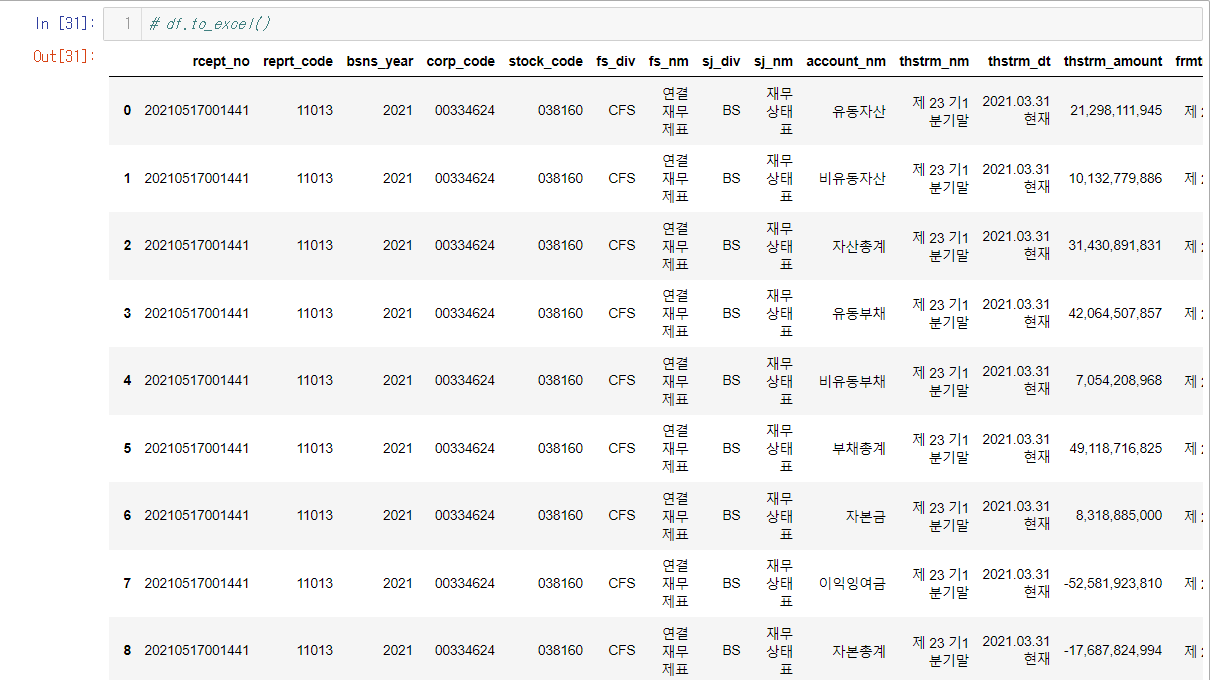

In [11]:
base_url = 'https://opendart.fss.or.kr/api/fnlttMultiAcnt.json' # json파일이 베이스인 각 회사의 재무재표 url을 다트에서 불러옴
crtfc_key = 'fc1fe4dfc0ac9df1cdaa3fa02e520e73ad64fc2e' # 각자의 Dart API키를 입력
bsns_year = input("년도수를 입력해 주세요(예시 :2021) : ") # 필요한 재무재표의 년도를 입력


a = input('몇 분기를 원하시나요? 숫자만 입력해주세요(예시 :1/2/3/4) : ') # a와 b는 임의값(잠시 정보를 저장했다가 사라짐)
                                                                        # 1분기/반기/3분기/사업보고서 중에서 하나를 선택하여 입력함
if a == '1' :       # 입력한 분기에 따라 그에 맞는 분기 코드를 if문으로 지정
    b = str(11013)  #1분기 = 11013
elif a == '2' :    
    b = str(11012)  # 반기 = 11012
elif a == '3' :
    b = str(11014)  # 3분기 = 11014
else :
    b = str(11011)  # 사업보고서 = 11011
    
reprt_code = b     # 각 분기에 맞는 코드를 갖고 있는 임의 값(b)를 reprt_code라는 변수에 넣은 후,
                   # reprt_code변수를 최종적으로 json파일을 요청할 url의 분기의 키값을 정함


df_corpcode = pd.read_csv('Dart_codelist_last30_2.csv', usecols = ['종목명','종목코드','기업코드','수정일'],
                          converters={'종목코드':str,'기업코드':str})
#  part 2에서 만든 기업코드 csv파일을 df_corpcode라는 데이터 프레임에 넣어서 사용하기 좋게 만들었음


JM =  pd.DataFrame([], columns = ['종목명','분기','기업코드', '유동자산', '부채총계'])
# part1에서 재무재표라는 최종적으로 만들 데이터 프레임의 틀을 짜줌

if reprt_code[-1] == '3':        # 재무재표에서 사용될 url에서 필요한 키 값인 reprt_code(분기를 구분함)에                             
    quarter = "1분기 보고서"     # 끝에 자릿수에 따라 몇 분기인지 quarter변수에 넣어줌                             
elif reprt_code[-1] == '2' :    # -> 이유는 재무재표 데이터 프레임의 몇분기인지 나타내기 위함 
    quarter ="반기 보고서"
elif reprt_code[-1] == '4' :
    quarter ="3분기 보고서"
else :
    quarter = "사업보고서"

for y in df_corpcode.index:   # 인덱스 값으로 기업코드(회사마다 기업코드가 다름) 찾고 그 찾은 기업코드를 후에 request_url로 넣었습니다.
    try:                      # 기업코드는 존재하지만 폐지되었거나 아직 재무재표가 json파일로 Dart라는 홈페이지에 올라오지 않는 경우를 거르기 위해서 try 사용
        corp_code_x = df_corpcode['기업코드'][y]   # 기업코드가 모여있는 데이터 프레임에서 기업코드만 corp_code라는 변수에 넣고 url에 들어갈 키값을 준비해둠
        name = df_corpcode['종목명'][y]            #기업코드가 모여있는 데이터 프레임에서 회사이름을 빼서 최정적으로 만들 데이터프레임(==재무제표)에 넣기 위해서 name이라는 변수를 지정

        request_url = base_url + '?' + 'crtfc_key='+crtfc_key+'&corp_code='+corp_code_x+\
        '&bsns_year='+bsns_year + '&reprt_code='+reprt_code        # 앞에서 계속 언급되었던 url을 만들고 요청하기 위한 변수를 만듬. 
                                                                   # 이 url을 이용하여 Dart에 각 회사의 분기별 재무재표 json파일을 요청할 수 있음

        response = requests.get(request_url).content # request_url을 넣어서 열리는 json파일을 요청하는 부분
        data = json.loads(response)        # json 파일 불러옴  
        data = data['list']                # 데이터를 살펴보면, dict 안에 dict가 있는 형태로 안쪽의 list 라는 dict를 꺼내옴 
        df = pd.DataFrame(data)            # 데이터프레임 변환

        if len(df.index) > 13 :            # 기업재무제표가 연결재무제표+재무제표일 때, 연결재무제표를 포함한 경우
            temp_Money = int(df['thstrm_amount'][13].replace(',','')) # 유동자산 값이 나오는 셀에서 ,를 삭제하고 int변환하여 할당
            temp_debt = int(df['thstrm_amount'][18].replace(',',''))  # 부채총계 값에서 ,를 삭제하고 int변환하여 새로운 변수로 할당
        else :                            # 그 밖에 연결재무제표는 없고, 재무제표만 있는 경우 
            temp_Money = int(df['thstrm_amount'][0].replace(',','')) #유동자산을 변수에 넣는 부분
            temp_debt = int(df['thstrm_amount'][5].replace(',','')) #부채총계를 변수에 넣는 부분
        Money = temp_Money 
        debt = temp_debt
        
        date = bsns_year + '년 ' + quarter # 위에서 할당한 연도, 분기 반영하여 날짜 변수 할당 

        JM =  JM.append({'종목명' :name,'분기' : date, '기업코드' : corp_code_x,'유동자산' : Money,'부채총계' : debt}
                        ,ignore_index=True) #JM(재무재표) 데이터 프레임에 각각의 값을 추가하는 부분입니다!!
    except:
        error_corp = name + ' : '+ corp_code_x  # 재무제표를 불러오는 과정에서 에러나면, 해당 종목명과 기업코드를 프린트. 
        print(error_corp)

JM['청산가치'] = JM['유동자산']-JM['부채총계']  # 기존의 '유동자산'과 '부채총계'의 뺄셈으로 청산가치'를 계산하는 열 생성 


년도수를 입력해 주세요(예시 :2021) : 2021
몇 분기를 원하시나요? 숫자만 입력해주세요(예시 :1/2/3/4) : 1
이큐셀 : 00818472
교보9호스팩 : 01398151
네추럴FNP : 00523176
교보10호기업인수목적 : 01476219
메디안디노스틱 : 01035942
미래에셋맵스리츠 : 01437292
씨앤에스링크 : 01116380
비엔디생활건강 : 01055317
극동전선 : 00105165
CNH : 00149266
세아메탈 : 00206084
삼성카드 : 00126292
흥국화재 : 00103176
인터엠 : 00145914
유진스팩4호 : 01359736
유진스팩5호 : 01393721
이지스레지던스리츠 : 01436628
넥스지 : 00584362
티씨엠생명과학 : 01067242
위월드 : 00663289
한국토지신탁 : 00233653
에이치엔에스하이텍 : 00311216
나눔테크 : 01117422
해원에스티 : 00252001
엘에이티 : 01264234
인카금융서비스 : 01013694
SK6호스팩 : 01414936
다원넥스뷰 : 01344363
루켄테크놀러지스 : 00886792
원바이오젠 : 01138993
파워풀엑스 : 01190780
프로테옴텍 : 01267958
경남은행 : 01030132
삼성증권 : 00104856
나우IB : 00651017
DB손해보험 : 00159102
모보 : 00347442
한국스탠다드차타드은행 : 00148504
케이비증권 : 00164876
한국씨티은행 : 00161444
나우코스 : 00425254
DB금융스팩8호 : 01505450
대신밸런스제9호스팩 : 01508855
DB금융투자 : 00115694
에이펙스인텍 : 00832700
플럼라인생명과학 : 01063237
제노텍 : 00393618
라이프사이언스테크놀로지 : 01187175
펨토바이오메드 : 01336735
파마리서치바이오 : 01066058
티에스엠텍 : 00397243
이노진 : 01419135
한국전기

In [13]:
JM

종목명             분기      기업코드            유동자산            부채총계  \
0       지놈앤컴퍼니  2021년 1분기 보고서  01276026     99444117279      5760122962   
1           웹젠  2021년 1분기 보고서  00405320    314276519067     94382174001   
2          우리넷  2021년 1분기 보고서  00664048     74625085569     37563510513   
3      마이크로디지탈  2021년 1분기 보고서  01267967      9950472707     10294936016   
4           나노  2021년 1분기 보고서  00994994     28248401252     27111418730   
5          손오공  2021년 1분기 보고서  00306870     29146591971     16129794502   
6         새로닉스  2021년 1분기 보고서  00147994     18118292184     38307850915   
7        피씨디렉트  2021년 1분기 보고서  00297934     82359213054     43373420759   
8        케이엠제약  2021년 1분기 보고서  01095704     12922269436     15139792736   
9         로보로보  2021년 1분기 보고서  01063990     14444134397       970676611   
10       DSR제강  2021년 1분기 보고서  00151298     87121944467     64008526208   
11       아이비김영  2021년 1분기 보고서  01414422     15738746337     25935889052   
12      한국정밀기계  2021년 1분기 보고서  00257732     51275725675     30526792225   
13         비비씨  2021년 1분기 보고서  01153105     28828621011      3789795411   
14          삼기  2021년 1분기 보고서  00799177    146108875018    288903971057   
15       유나이티드  2021년 1분기 보고서  00158963    194670977157     85448895356   
16        지니언스  2021년 1분기 보고서  00962223     27070846233      7706268189   
17         파라텍  2021년 1분기 보고서  00105138     65183491466     53192442179   
18      예스코홀딩스  2021년 1분기 보고서  00105101    225192404000    138203978000   
19        시노펙스  2021년 1분기 보고서  00203023     49666048699     61163433967   
20        모나리자  2021년 1분기 보고서  00173102     35914997626     20727599894   
21      티웨이홀딩스  2021년 1분기 보고서  00109514     14899954895     43525168751   
22     씨앤지하이테크  2021년 1분기 보고서  00605328     62199444980     15711865365   
23        삼화왕관  2021년 1분기 보고서  00129235     46300735991     86977147479   
24          백산  2021년 1분기 보고서  00122551    119465079925    119264124737   
25     피엔에이치테크  2021년 1분기 보고서  01112889     20438949135     12471244868   
26        하림지주  2021년 1분기 보고서  00148364     66403117423    683022735689   
27        에스코넥  2021년 1분기 보고서  00573269     49052861270     61486649974   
28        삼성제약  2021년 1분기 보고서  00126414     93677734577     15553106086   
29       화인베스틸  2021년 1분기 보고서  00661847     60064054646     97633646535   
...        ...            ...       ...             ...             ...   
1529     한일시멘트  2021년 1분기 보고서  01319808    498259110176    731613286759   
1530      롯데푸드  2021년 1분기 보고서  00120508   1231152161314    978229717017   
1531       우리로  2021년 1분기 보고서  00296005     23058040064     32836879914   
1532  삼성바이오로직스  2021년 1분기 보고서  00877059   1781745354686   1363758562226   
1533   나이스정보통신  2021년 1분기 보고서  00264945    202141658761     87028044725   
1534    파크시스템스  2021년 1분기 보고서  00244747     75416409432     53403919750   
1535      아이센스  2021년 1분기 보고서  00550994    147659762221     75754565930   
1536    다산네트웍스  2021년 1분기 보고서  00268251     55719487185     59741127953   
1537      맘스터치  2021년 1분기 보고서  01089855     51265062092     32894188849   
1538        대교  2021년 1분기 보고서  00108913    200568229777    226316431635   
1539      동국제강  2021년 1분기 보고서  00114792   1524972318881   2975713445661   
1540       아리온  2021년 1분기 보고서  00441128     14683330175     36067391464   
1541        GV  2021년 1분기 보고서  00455112     49726824973     61886499505   
1542   SGA솔루션즈  2021년 1분기 보고서  00988364     12488903990     15003161112   
1543     한화솔루션  2021년 1분기 보고서  00162461   3583529923079   4838177253640   
1544    한국조선해양  2021년 1분기 보고서  00164830  10933352812000  16144989044000   
1545      신화실업  2021년 1분기 보고서  00137809     48313007262     36255475570   
1546        대원  2021년 1분기 보고서  00111838    280235830815    160956066205   
1547   제이씨현시스템  2021년 1분기 보고서  00223513     90548028009     39116944882   
1548     한솔홀딩스  2021년 1분기 보고서  00171636     60787597903     21726909366   
1549    롯데하이마트  2021년 1분기 보고서  00158307    994567752410   1430265597630   
1550    SM C&C  2021년 1분기 보고서  00185

In [12]:
JM.to_csv("JM_2021_1Q.csv", header=True, index=False, encoding ='utf-8-sig')
# csv파일로 저장, encoding을 위해 'utf-8-sig' 추가 